In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
import sklearn
from sklearn.linear_model import LinearRegression

In [5]:
spotify_all = pd.read_csv('/users/veronicaventure/Desktop/spotify_data.csv')
spotify_all.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
spotify_df=spotify_all.drop(['song_title', 'artist'], axis=1)
spotify_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [7]:
spotify_df=spotify_df.drop(spotify_df.columns[0], axis = 1)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


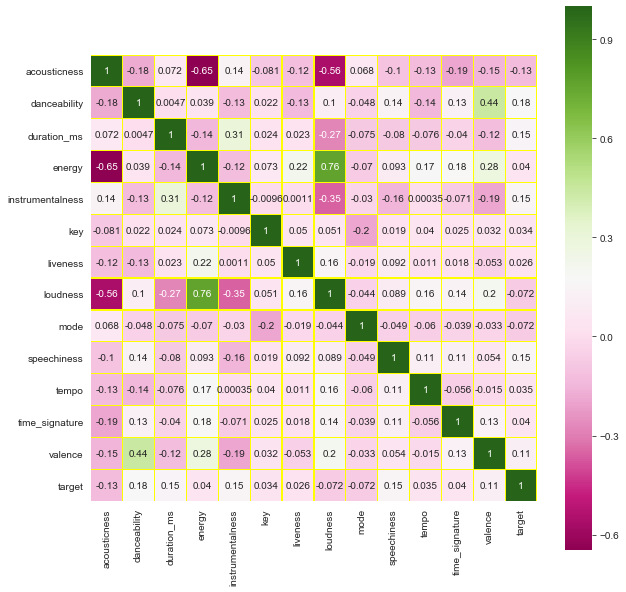

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(spotify_df.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'PiYG',
            linecolor = 'yellow',
            annot= True);

## Linear regression with Like/not like target
Note: this whole thing doesn't work. I need to use logistic regression for classification.

In [13]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [9]:
#all columns except target
X_multi = spotify_df.drop('target',1)

# Targets
Y_target = spotify_df.target

In [10]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -0.31 


In [12]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [29]:
#create a df to show the coefficients of the model
# Set a DataFrame from the Features
coeff_df = DataFrame(spotify_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,acousticness,-3.253308e-01
1,danceability,4.152529e-01
2,duration_ms,5.623683e-07
3,energy,9.027844e-02
4,instrumentalness,2.676363e-01
5,key,9.746404e-04
6,liveness,9.815487e-02
7,loudness,-2.329719e-02
8,mode,-3.480749e-02
9,speechiness,8.164797e-01


#### Training and Validation

In [13]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,spotify_df.target)



In [14]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1512, 13) (505, 13) (1512,) (505,)


In [12]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

NameError: name 'lreg' is not defined

In [16]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [17]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.22
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.22


Text(0.5,1,'Residual Plots')

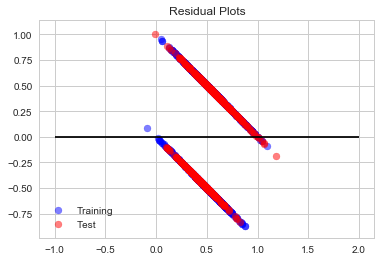

In [37]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-1,xmax=2)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

## Linear Regression Danceability

In [9]:
dance_df=spotify_df.drop(['target'], axis=1)
dance_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [10]:
danceX_multi= dance_df.drop('danceability', axis=1)
dance_Y=dance_df.danceability
dance_Y.head()
danceX_multi.head()

,acousticness,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [14]:
lreg.fit(danceX_multi,dance_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 0.72 


In [16]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 12 


In [17]:
#create a df to show the coefficients of the model
# Set a DataFrame from the Features
coeff_df = DataFrame(danceX_multi.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,acousticness,-1.549094e-01
1,duration_ms,1.438323e-07
2,energy,-2.724006e-01
3,instrumentalness,1.083497e-02
4,key,1.786600e-04
5,liveness,-1.074136e-01
6,loudness,8.054685e-03
7,mode,-9.318479e-03
8,speechiness,2.472352e-01
9,tempo,-8.899271e-04


### Training and Validation

In [18]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(danceX_multi,dance_df.danceability)


In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1512, 12) (505, 12) (1512,) (505,)


In [20]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [22]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.02
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.02


Text(0.5, 1.0, 'Residual Plots')

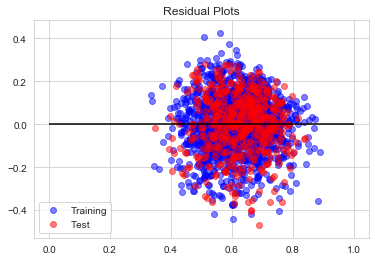

In [23]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=0,xmax=1)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

### Danceability V. specific factors

Text(0, 0.5, 'Number of Songs')

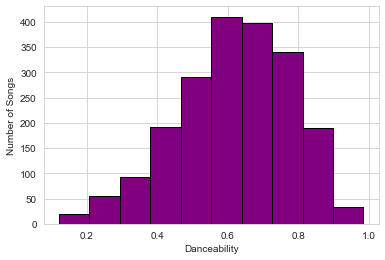

In [24]:
plt.hist(dance_df.danceability, bins=10, color= 'Purple', edgecolor= 'Black')
plt.xlabel('Danceability')
plt.ylabel('Number of Songs')

Text(0, 0.5, 'danceability')

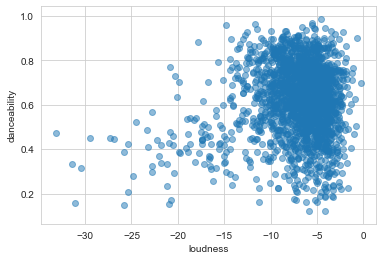

In [25]:
plt.scatter(dance_df.loudness, dance_df.danceability, alpha=.5)
plt.xlabel('loudness')
plt.ylabel('danceability')

Text(0, 0.5, 'danceability')

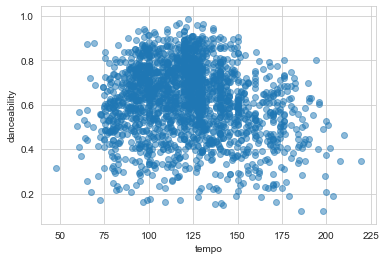

In [26]:
plt.scatter(dance_df.tempo, dance_df.danceability, alpha=.5)
plt.xlabel('tempo')
plt.ylabel('danceability')

Text(0, 0.5, 'danceability')

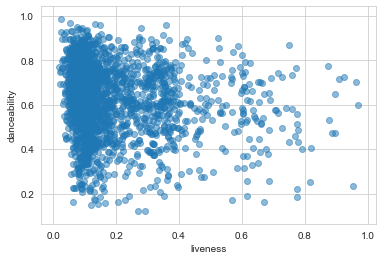

In [27]:
plt.scatter(dance_df.liveness, dance_df.danceability, alpha=.5)
plt.xlabel('liveness')
plt.ylabel('danceability')

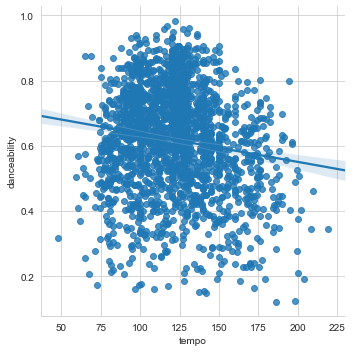

In [28]:
# Using seabron to create a linear fit
sns.lmplot('tempo','danceability',data = dance_df)

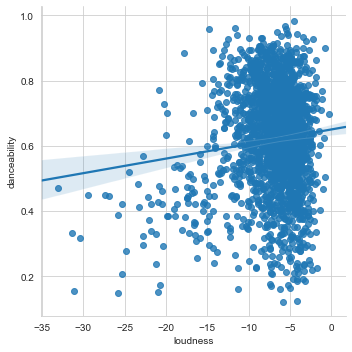

In [29]:
# Using seabron to create a linear fit
sns.lmplot('loudness','danceability',data = dance_df)

### Logistic Regression

In [33]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [30]:
#all columns except target
X_multi = spotify_df.drop('target',1)

# Targets
Y_target = spotify_df.target

In [35]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X_multi,Y_target)

# Check our accuracy
log_model.score(X_multi,Y_target)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5409023301933564

Looks like our model is only accurate about 54% of the time.
If we calculate the mean of the target, we can calculate the percent of songs that are 'liked'

In [36]:
Y_target.mean()

0.5057015369360436

So the mean of the target is about 0.5 which means that if we just guessed that we liked the song we would be right about 50% of the time which is not much less than our model can predict.

##### Now we can check which coefficients are the strongest predictors

In [37]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X_multi.columns, np.transpose(log_model.coef_)))


In [38]:
coeff_df


,0,1
0,acousticness,[-6.421288034669894e-05]
1,danceability,[1.1696395929825266e-05]
2,duration_ms,[2.120292644047515e-06]
3,energy,[-1.8577442918369728e-05]
4,instrumentalness,[5.1844138549001645e-05]
5,key,[-8.408702297512997e-05]
6,liveness,[-3.576399005148531e-06]
7,loudness,[3.4851151238266555e-05]
8,mode,[-8.429156954048733e-05]
9,speechiness,[1.7592531202189596e-05]


A positive coefficient corresponds to an increased likelihood that the song is 'liked.' A negative coefficent corresponds to an increased likehood that the song is 'not liked.'


#### Test and Train Data Sets

In [39]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y_target)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.5346534653465347


It looks like this model does not work very well at only about 53%